# Content
     
**Data Preprocessing** 
- Bibliotecas e configurações
- Carregamento dos dados
- Glossário
- Lidando com dados faltantes - KNN Inputer
- Feature Engieenier
   
**EDA**
- Analise Univariada
- Analise Multivariada
- Insights
   
**Data Preparation**
- Lidando com Outliers - Isolation Forest
- Normalização
- Padronização
- Redução de dimensionalidade 
 - PCA
 - UMAP
 - t-SNE

**Machine Learning**
- Kmeans
- Hieracical Cluster
- Gausian Mistured Model

# Data Preprossesing

## Blibliotecas e configurações

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import warnings

from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
#from pandas_profiling import ProfileReport

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy

from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from umap.umap_ import UMAP
from sklearn.manifold import TSNE

from plotly.offline import plot, iplot, init_notebook_mode
import plotly as py
from plotly import express as px
import plotly.graph_objs as go

from IPython.display import HTML
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def jupyter_menu_settings():   
    
    """ Best looking changes """
    
    display(HTML("""
            <style>

            h1 {
            background-color: #0E2031;
            color: white;
            padding: 15px 15px;
            text-align: center;
            font-family: Arial, Helvetica, sans-serif;
            border-radius:10px 10px;
            }

            h2 {
            background-color: #153656;
            color: white;
            padding: 10px 10px;
            text-align: center;
            font-family: Arial, Helvetica, sans-serif
            border-radius:10px 10px;
            }

            </style>            
    """))

def jupyter_table_settings():
    pd.set_option('display.expand_frame_repr', False )
    pd.set_option('display.max_columns', 30)
    pd.set_option('display.max_rows', 30)

In [3]:
def matplotlib_settings():
    """ Optimize general settings, standardize plot sizes, etc. """
    
#     %matplotlib inline
#     plt.style.use( 'ggplot' )
#     plt.rcParams['figure.figsize'] = [12, 6]
#     plt.rcParams['font.size'] = 20

In [4]:
jupyter_menu_settings()
jupyter_table_settings()

## Carregamento dos dados

In [5]:
data_raw = pd.read_csv('../data/CC_GENERAL.csv', encoding='iso-8859-1')
data_raw.shape

(8950, 18)

In [6]:
data = data_raw.copy()

In [7]:
# A base de dados é relativamente pequena e os dados são todos numéricos com exessão do CUST_ID, isso é um facilitador
# mais adiante no desenvolvimento do algoritimo de Machine Learning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Glossário

In [8]:
glossary_pt = [['Colunas', 'Significado'],
              ['CUST_ID', 'Identificador único do cliente'],
              ['BALANCE', 'Valor do saldo do cartão de crédito deixado na conta para fazer compras'],
              ['BALANCE_FREQUENCY', 'Frequência com que o saldo é atualizado, pontuação entre 0 e 1 (1 = Alto, 0 = Baixo)'],
              ['PURCHASES', 'Valor das compras feitas na conta'],
              ['ONEOFF_PURCHASES', 'Valor máximo de compra feito de uma só vez'],
              ['INSTALLMENTS_PURCHASES', 'Valor da compra parcelada'],
              ['CASH_ADVANCE', 'Dinheiro adiantado dado pelo usuário'],
              ['PURCHASES_FREQUENCY', 'Com que frequência as compras estão sendo feitas, pontuação entre 0 e 1 (1 = alta, 0 = baixa)'],
              ['ONEOFF_PURCHASES_FREQUENCY', 'Com que frequência as compras acontecem de uma só vez (1 = Alta, 0 = Baixa)'],
              ['PURCHASES_INSTALLMENTS_FREQUENCY', 'Com que frequência as compras parceladas estão sendo feitas (1 = Alta, 0 = Baixa)'],
              ['CASH_ADVANCE_FREQUENCY', 'Com que frequência o adiantamento em dinheiro está sendo pago'],
              ['CASH_ADVANCE_TRX', 'Número de transações feitas com "Cash in Advanced"'],
              ['PURCHASES_TRX', 'Número de transações de compra feitas'],
              ['CREDIT_LIMIT', 'Limite de Cartão de Crédito por usuário'],
              ['PAYMENTS', 'Valor do pagamento feito pelo usuário'],
              ['MINIMUM_PAYMENTS', 'Valor mínimo de pagamentos feitos pelo usuário'],
              ['PRC_FULL_PAYMENT', 'Porcentagem do pagamento integral pago pelo usuário'],
              ['TENURE', 'Prazo do serviço de cartão de crédito para o usuário']
              ]
print(tabulate(glossary_pt, headers='firstrow', stralign='left', tablefmt='simple'))

Colunas                           Significado
--------------------------------  ---------------------------------------------------------------------------------------------
CUST_ID                           Identificador único do cliente
BALANCE                           Valor do saldo do cartão de crédito deixado na conta para fazer compras
BALANCE_FREQUENCY                 Frequência com que o saldo é atualizado, pontuação entre 0 e 1 (1 = Alto, 0 = Baixo)
PURCHASES                         Valor das compras feitas na conta
ONEOFF_PURCHASES                  Valor máximo de compra feito de uma só vez
INSTALLMENTS_PURCHASES            Valor da compra parcelada
CASH_ADVANCE                      Dinheiro adiantado dado pelo usuário
PURCHASES_FREQUENCY               Com que frequência as compras estão sendo feitas, pontuação entre 0 e 1 (1 = alta, 0 = baixa)
ONEOFF_PURCHASES_FREQUENCY        Com que frequência as compras acontecem de uma só vez (1 = Alta, 0 = Baixa)
PURCHASES_INSTALLMENTS

## Lidando com valores faltantes - KNN Inputer

In [9]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
X_knn = data.drop(['CUST_ID'], axis=1)
numerical_features = X_knn.select_dtypes(include = ['int64','float64']).columns.values

In [11]:
#Exemplo de linha com dados faltantes
data.iloc[8946]

CUST_ID                                 C19187
BALANCE                              19.183215
BALANCE_FREQUENCY                          1.0
PURCHASES                                300.0
ONEOFF_PURCHASES                           0.0
INSTALLMENTS_PURCHASES                   300.0
CASH_ADVANCE                               0.0
PURCHASES_FREQUENCY                        1.0
ONEOFF_PURCHASES_FREQUENCY                 0.0
PURCHASES_INSTALLMENTS_FREQUENCY      0.833333
CASH_ADVANCE_FREQUENCY                     0.0
CASH_ADVANCE_TRX                             0
PURCHASES_TRX                                6
CREDIT_LIMIT                            1000.0
PAYMENTS                            275.861322
MINIMUM_PAYMENTS                           NaN
PRC_FULL_PAYMENT                           0.0
TENURE                                       6
Name: 8946, dtype: object

In [12]:
num_imputer = KNNImputer()
num_imputer.fit(X_knn[numerical_features])
X_knn[numerical_features] = num_imputer.transform(X_knn[numerical_features])

In [13]:
# MINIMUM_PAYMENTS para o cliente C19187 encontrado pelo KNN foi 156.06
X_knn.loc[8946]

BALANCE                               19.183215
BALANCE_FREQUENCY                      1.000000
PURCHASES                            300.000000
ONEOFF_PURCHASES                       0.000000
INSTALLMENTS_PURCHASES               300.000000
CASH_ADVANCE                           0.000000
PURCHASES_FREQUENCY                    1.000000
ONEOFF_PURCHASES_FREQUENCY             0.000000
PURCHASES_INSTALLMENTS_FREQUENCY       0.833333
CASH_ADVANCE_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                       0.000000
PURCHASES_TRX                          6.000000
CREDIT_LIMIT                        1000.000000
PAYMENTS                             275.861322
MINIMUM_PAYMENTS                     156.060050
PRC_FULL_PAYMENT                       0.000000
TENURE                                 6.000000
Name: 8946, dtype: float64

In [14]:
data_new = pd.concat([data[['CUST_ID']], X_knn],axis=1)
data_new.shape

(8950, 18)

In [15]:
data_new.duplicated().sum()

0

## Feature Engieenier

In [16]:
#Etapa pentende, como o projeto tem tempo pré definido essa etapa foi deixada por ultimo, talvez seja completa em um outro ciclo

# EDA

In [17]:
#data_new.loc[(data_new.PURCHASES ==0) & (data_new.CASH_ADVANCE ==0)]

In [18]:
data_new.sample(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
7669  C17875    16.834929           0.454545      15.00             15.00                    0.00    209.025389             0.090909                    0.090909                          0.000000                0.090909               1.0            1.0        7500.0   430.213001         86.959785          0.000000    11.0
6125  C16296   540.020858           1.000000     612.23            495.61                  116.62   1708.923217             0.666667                    0.166667                          0.500000                0.333333              10.0           10.0        2000.0  1642.068707        419.956251          0.000000    12.0
7028  C17219   119.237712           1.000000     342.74              0.00                  342.74      0.000000             1.000000                    0.000000                          1.000000                0.000000               0.0           20.0        2000.0   327.166041        165.207233          0.000000    12.0
3019  C13108   894.081947           1.000000    1901.71           1853.11                   48.60    206.618780             0.666667                    0.666667                          0.416667                0.083333               1.0           33.0        1500.0   947.130141        220.745296          0.000000    12.0
3479  C13576  1294.145453           1.000000    3059.10           1836.98                 1222.12      0.000000             1.000000                    0.416667                          1.000000                0.000000               0.0           42.0        7000.0  5560.033502        497.637767          0.083333    12.0

## Analise Univariada

In [19]:
def display_stats(sumary):   
    
    '''Tabela Resumo Estilizada'''
    
    sumary=sumary.describe().T  
    
    #skewness=sumary.skew()
    #kurtosis=sumary.kurtosis()
    #aux=sumary.append([skewness, kurtosis], ignore_index=True)
    #idx=pd.Series(['count','mean','std','min','25%','50%','75%','max','skewness','kurtosis'],name='Tabela Resumo')
    #sumary=pd.concat([aux,idx],axis=1).set_index('Tabela Resumo').T
    cm = sns.light_palette("#A2A2A2", as_cmap = True)
    display(sumary.style.format('{:.2f}').background_gradient(subset=(sumary.index[1:],sumary.columns[:]),cmap=cm))

In [20]:
display_stats(data_new)

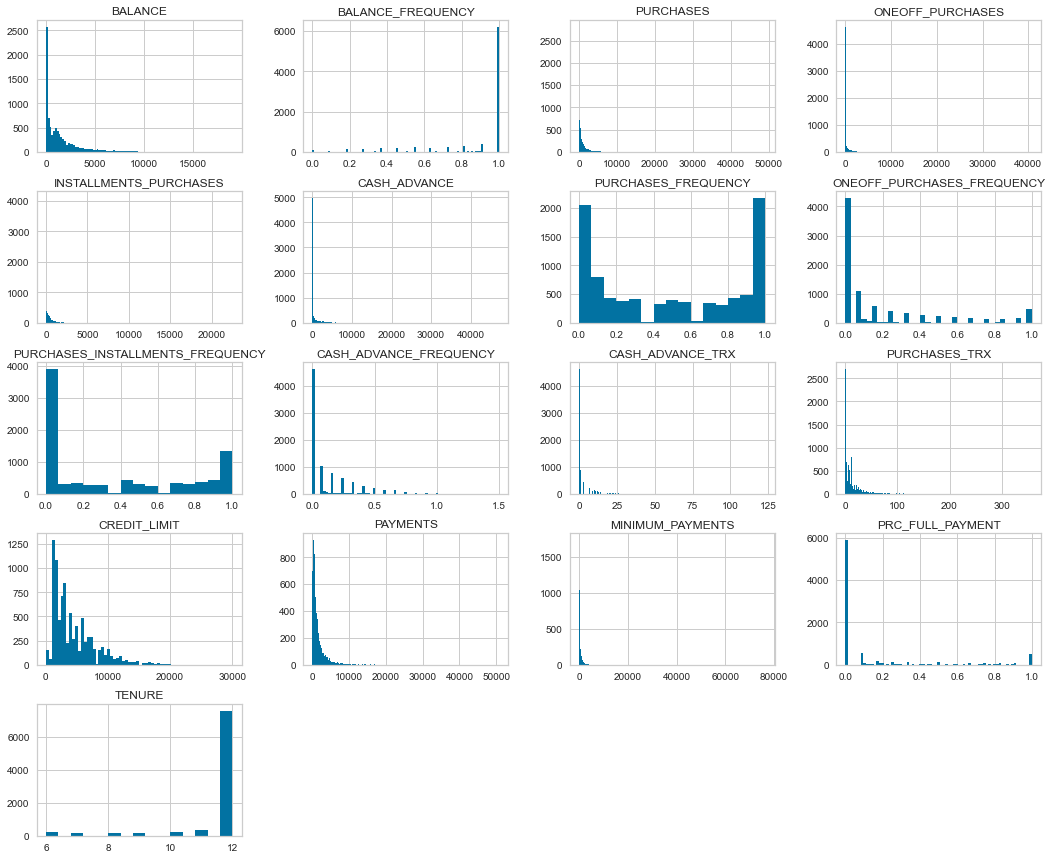

In [21]:
data_new[numerical_features].hist(figsize=(18,15), bins='auto');

### Numero de Clientes não "Ativos" e muito pouco "Ativos"

In [22]:
# O valor de 0.1 de frequencia foi arbitrário

no_balance_frequency = data_new.loc[data_new.BALANCE_FREQUENCY == 0 ]#.count()
very_balance_frequency = data_new.loc[(data_new.BALANCE_FREQUENCY > 0) & (data_new.BALANCE_FREQUENCY < 0.15) & (data_new.BALANCE > 0)]

In [23]:
display_stats(no_balance_frequency)
display_stats(very_balance_frequency)

### Clientes que estouraram o cartão de crédito e estão solicitando adiantamento do crédito

In [24]:
#data_new.loc[(data_new.PURCHASES ==0) & (data_new.CASH_ADVANCE ==0)] Cliente estranho, verificar
no_credit=data_new.loc[(data_new.PURCHASES ==0) & (data_new.CASH_ADVANCE !=0)]
display_stats(no_credit)

### Clientes que estouraram o cartão de crédito e pagaram menos que o pagamento mínimo

In [25]:
payment_less_minimum = no_credit.loc[no_credit.PAYMENTS < no_credit.MINIMUM_PAYMENTS]
display_stats(payment_less_minimum)

In [26]:
no_credit.loc[(no_credit.PRC_FULL_PAYMENT > 0) & (no_credit.PRC_FULL_PAYMENT < 0.04)]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

In [27]:
data.ONEOFF_PURCHASES.loc[data.ONEOFF_PURCHASES > 400]#.counts(normalize=True)

2        773.17
3       1499.00
6       6402.63
8        661.49
9       1281.60
         ...   
8910     465.00
8923     939.09
8939     734.40
8944    1012.73
8949    1093.25
Name: ONEOFF_PURCHASES, Length: 2686, dtype: float64

In [28]:
data.ONEOFF_PURCHASES.loc[data.ONEOFF_PURCHASES > 400]#.counts(normalize=True)
print(len(data.ONEOFF_PURCHASES.loc[data.ONEOFF_PURCHASES > 1000])/data.shape[0])
print(len(data.ONEOFF_PURCHASES.loc[data.ONEOFF_PURCHASES < 10])/data.shape[0])

0.16871508379888267
0.48391061452513967


In [29]:
data_new.CASH_ADVANCE_TRX.value_counts(normalize=True)

0.0      0.517095
1.0      0.099106
2.0      0.069274
3.0      0.048715
4.0      0.042905
           ...   
39.0     0.000112
56.0     0.000112
107.0    0.000112
53.0     0.000112
41.0     0.000112
Name: CASH_ADVANCE_TRX, Length: 65, dtype: float64

In [30]:
data_new.CREDIT_LIMIT.mode()

0    3000.0
dtype: float64

## Analise Multivariada

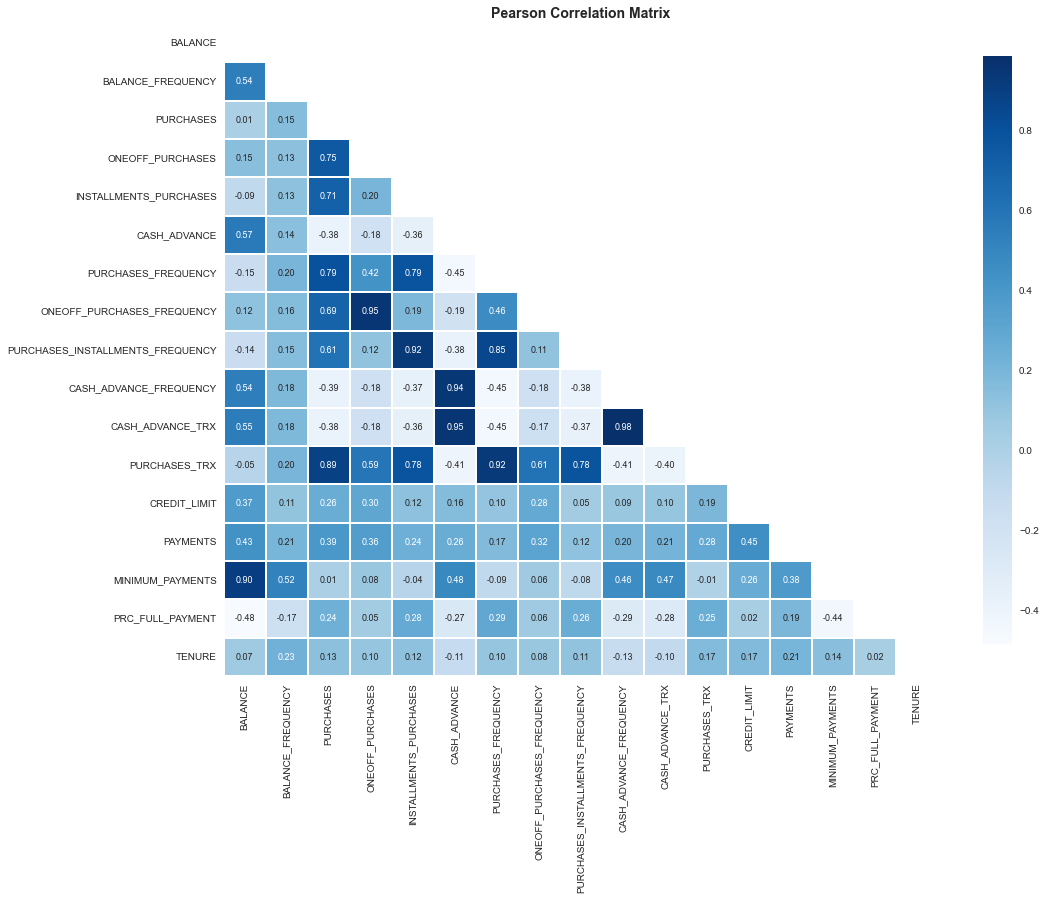

In [31]:
mask = np.zeros_like(data_new.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

plt.title('Pearson Correlation Matrix',fontsize=14, fontweight='bold')

sns.heatmap(data_new.corr(method='spearman'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});

- Existe uma grande correlação com a modalidade de compra com a frequencia da compra, ONEOFF_PURCHASES / ONEOFF_PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES / PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE / CASH_ADVANCE_FREQUENCY, 


In [32]:
#profile = ProfileReport(data_new, title="Pandas Profiling Report", html={'style':{'full_width':True}})

In [33]:
#profile.to_notebook_iframe()

## Insights

- Existem dois perfis de clientes dominantes de clientes com relação a frequencia de uso do cartão de crédito, os clientes que quase não utilizam o cartão de crédito e o que frequentemente utilizam o cartão de crédito.



- Como esperado adiantamento de crédito não é uma pratica comum a todos os clientes, como pode ser observado na tabela resumo. As vezes

- 51,71% dos clientes não solicitaram nenhuma vez adiantamento do cartão de crédito.

- 48,39% dos cliente não fazem nenhuma compra pontual e apenas 16,87% dos clientes fizeram compras pontuais no cartão de crédito no valor superior a \$\1000. As vezes esse perfil de cliente nesse Banco preferem outras modalidades de emprestimo, para compras superiores ao seu padrão normal de consumo que não seja pelo disponível no cartão de crédito 
- 

- Existem campos que o CASH_ADVANCE_FREQUENCY é superior a um isso pode ter um significado pro negócio ( pagamento antecipado) ou pode ser um erro de imputação de dado.

- A maioria dos clientes preferem o prazo de 12 meses em comparação com outras opções de prazo. 

- Ao investigar mais a coluna SALDO, parece que há muitos cartões de crédito com saldo 0. Também é compatível com outros valores de compra 0 na coluna COMPRA. Com base nesses resultados, pode-se supor que alguns usuários estão intencionalmente mantendo o saldo baixo em sua conta para obter um limite de crédito alto, o que afeta o aumento da taxa de utilização de crédito e a pontuação de crédito.

# Data Preparation

## Lidando com Outliers - Isolation Forest

In [34]:
data_noutliers = data_new.copy()

In [35]:
# Arbitariamente assumindo que 0.01% do dataset são outliers o que corresponde aproximadamente no máximo 90 amostras
isfo = IsolationForest(contamination=0.01, random_state = RANDOM_SEED)#, max_samples = 100, )
isfo.fit(data_noutliers[numerical_features])

C:\Users\Alysson\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.01, random_state=42)

In [36]:
data_noutliers['anomaly_score'] =  isfo.decision_function(data_noutliers[numerical_features])
data_noutliers['anomaly'] = isfo.predict(data_noutliers[numerical_features])

In [37]:
print("Number of rows with outliers:", data_noutliers[data_noutliers['anomaly'] == -1].shape[0])
print("Number of rows without outliers", data_noutliers[data_noutliers['anomaly'] == 1].shape[0])
print("Number of original rows:", data_new.shape[0])

Number of rows with outliers: 90
Number of rows without outliers 8860
Number of original rows: 8950


In [38]:
data_noutliers['anomaly'].value_counts(normalize=True)

 1    0.989944
-1    0.010056
Name: anomaly, dtype: float64

In [39]:
# palette = ['#ff7f0e','#1f77b4']
# sns.pairplot(data_noutliers, vars=numerical_features, hue='anomaly', palette=palette)

In [40]:
data_prep = data_noutliers.loc[data_noutliers['anomaly']==1]

In [41]:
data_prep = data_prep.drop(columns=['anomaly','anomaly_score'], axis=1)

In [42]:
data_prep

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
0     C10001    40.900749           0.818182      95.40              0.00                   95.40      0.000000             0.166667                    0.000000                          0.083333                0.000000               0.0            2.0        1000.0   201.802084        139.509787          0.000000    12.0
1     C10002  3202.467416           0.909091       0.00              0.00                    0.00   6442.945483             0.000000                    0.000000                          0.000000                0.250000               4.0            0.0        7000.0  4103.032597       1072.340217          0.222222    12.0
2     C10003  2495.148862           1.000000     773.17            773.17                    0.00      0.000000             1.000000                    1.000000                          0.000000                0.000000               0.0           12.0        7500.0   622.066742        627.284787          0.000000    12.0
3     C10004  1666.670542           0.636364    1499.00           1499.00                    0.00    205.788017             0.083333                    0.083333                          0.000000                0.083333               1.0            1.0        7500.0     0.000000        379.829982          0.000000    12.0
4     C10005   817.714335           1.000000      16.00             16.00                    0.00      0.000000             0.083333                    0.083333                          0.000000                0.000000               0.0            1.0        1200.0   678.334763        244.791237          0.000000    12.0
...      ...          ...                ...        ...               ...                     ...           ...                  ...                         ...                               ...                     ...               ...            ...           ...          ...               ...               ...     ...
8945  C19186    28.493517           1.000000     291.12              0.00                  291.12      0.000000             1.000000                    0.000000                          0.833333                0.000000               0.0            6.0        1000.0   325.594462         48.886365          0.500000     6.0
8946  C19187    19.183215           1.000000     300.00              0.00                  300.00      0.000000             1.000000                    0.000000                          0.833333                0.000000               0.0            6.0        1000.0   275.861322        156.060050          0.000000     6.0
8947  C19188    23.398673           0.833333     144.40              0.00                  144.40      0.000000             0.833333                    0.000000                          0.666667                0.000000               0.0            5.0        1000.0    81.270775         82.418369          0.250000     6.0
8948  C19189    13.457564           0.833333       0.00              0.00                    0.00     36.558778             0.000000                    0.000000                          0.000000                0.166667               2.0            0.0         500.0    52.549959         55.755628          0.250000     6.0
8949  C19190   372.708075           0.666667    1093.25           1093.25                    0.00    127.040008             0.666667                    0.666667                          0.000000                0.333333               2.0           23.0        1200.0    63.165404         88.288956          0.000000     6.0

[8860 rows x 18 columns]

## Normalization

In [43]:
#data_prep=data_new.copy() Testing without isolation forest

In [44]:
log_columns = data_prep.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]
log_columns

MINIMUM_PAYMENTS              14.379889
INSTALLMENTS_PURCHASES         6.513429
CASH_ADVANCE_TRX               5.585919
PAYMENTS                       4.784280
ONEOFF_PURCHASES               4.046439
PURCHASES_TRX                  3.990547
CASH_ADVANCE                   3.885995
PURCHASES                      3.402333
BALANCE                        2.260337
PRC_FULL_PAYMENT               1.962302
CASH_ADVANCE_FREQUENCY         1.824329
ONEOFF_PURCHASES_FREQUENCY     1.575175
CREDIT_LIMIT                   1.469088
dtype: float64

In [45]:
for col in log_columns.index:
    data_prep[col] = np.log1p(data_prep[col])

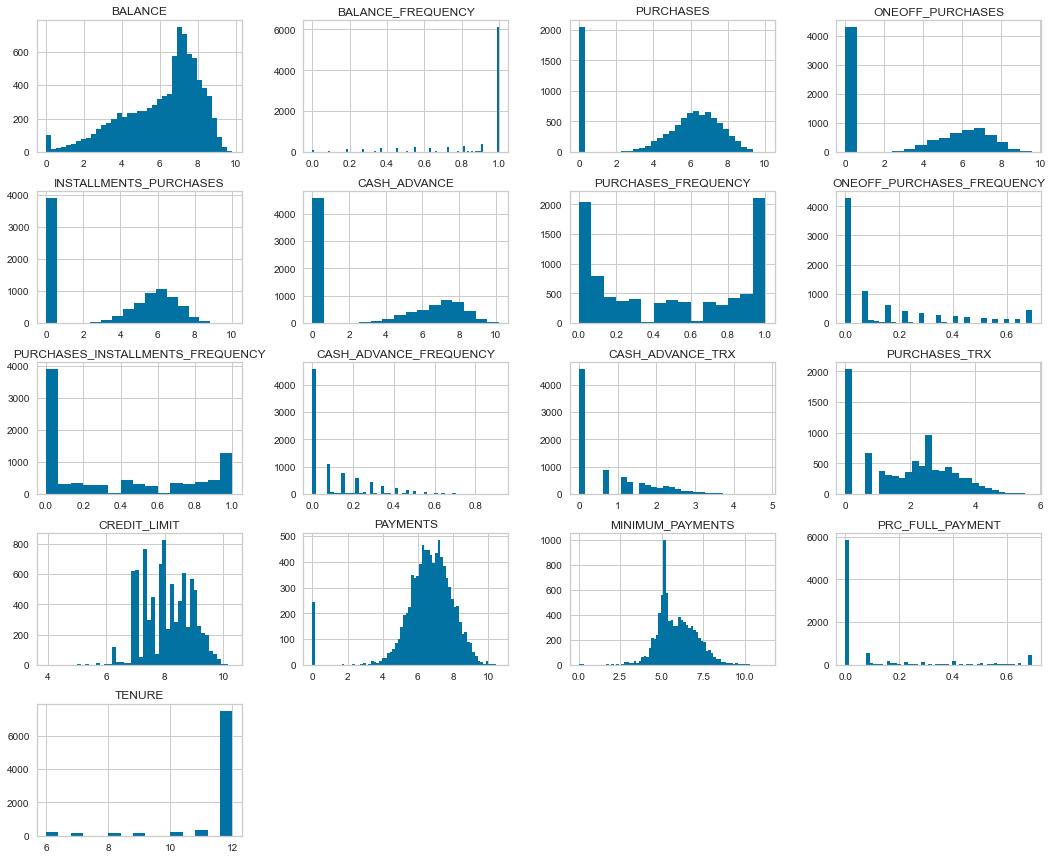

In [46]:
data_prep[numerical_features].hist(figsize=(18,15), bins='auto');

## Padronização

In [47]:
mms = MinMaxScaler()

for col in data_prep[numerical_features]:
    data_prep[col] = mms.fit_transform(data_prep[[col]]).squeeze()

In [51]:
data_prep.head()

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
0  C10001  0.380170           0.818182   0.455879          0.000000                0.455879      0.000000             0.166667                    0.000000                          0.083333                0.000000          0.000000       0.191510      0.466811  0.500576          0.438874          0.000000     1.0
1  C10002  0.821548           0.909091   0.000000          0.000000                0.000000      0.861905             0.000000                    0.000000                          0.000000                0.243529          0.333889       0.000000      0.771814  0.783975          0.620013          0.289506     1.0
2  C10003  0.796156           1.000000   0.663764          0.695640                0.000000      0.000000             1.000000                    1.000000                          0.000000                0.000000          0.000000       0.447122      0.782631  0.606343          0.572303          0.000000     1.0
3  C10004  0.755107           0.636364   0.729767          0.764811                0.000000      0.523939             0.083333                    0.115477                          0.000000                0.087355          0.143798       0.120830      0.782631  0.000000          0.527702          0.000000     1.0
4  C10005  0.682698           1.000000   0.282719          0.296295                0.000000      0.000000             0.083333                    0.115477                          0.000000                0.000000          0.000000       0.120830      0.495375  0.614491          0.488693          0.000000     1.0

## Dimensionality Reduction - PCA

In [49]:
# Checking All components first
pca = PCA(n_components=data_prep[numerical_features].shape[1], random_state=RANDOM_SEED)
components = pca.fit_transform(data_prep[numerical_features])
components.shape

(8860, 17)

In [50]:
nfeatures = range(pca.n_components_)
nfeatures

range(0, 17)

In [42]:
pca.explained_variance_ratio_

array([0.45793682, 0.16449454, 0.13390872, 0.06408294, 0.04744675,
       0.03704325, 0.02443759, 0.01500813, 0.01155607, 0.01056209,
       0.00943648, 0.00864794, 0.00690654, 0.00295613, 0.00219305,
       0.00206926, 0.00131369])

In [43]:
data_prep[numerical_features].var().sort_values(ascending=False)

PURCHASES_FREQUENCY                 0.160508
PURCHASES_INSTALLMENTS_FREQUENCY    0.156652
CASH_ADVANCE                        0.122082
ONEOFF_PURCHASES                    0.116277
ONEOFF_PURCHASES_FREQUENCY          0.095082
INSTALLMENTS_PURCHASES              0.093440
PRC_FULL_PAYMENT                    0.092210
PURCHASES                           0.083619
BALANCE_FREQUENCY                   0.056486
PURCHASES_TRX                       0.055724
TENURE                              0.049927
CASH_ADVANCE_TRX                    0.043011
BALANCE                             0.041800
CASH_ADVANCE_FREQUENCY              0.028573
PAYMENTS                            0.021925
CREDIT_LIMIT                        0.016221
MINIMUM_PAYMENTS                    0.011544
dtype: float64

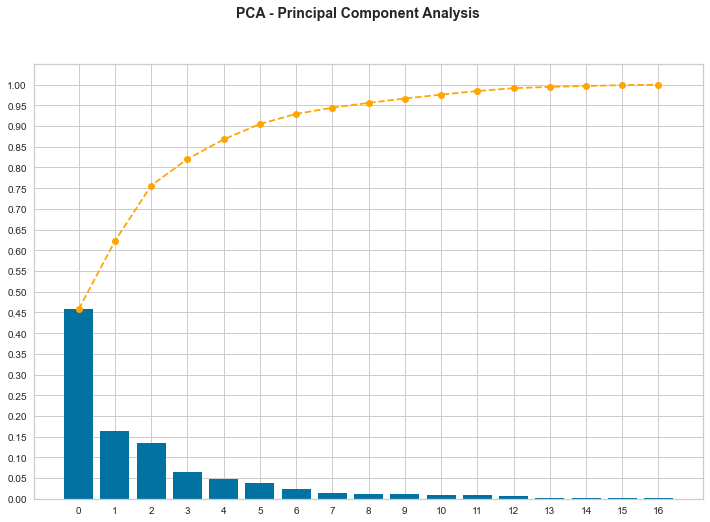

In [44]:
plt.figure(figsize=(12,8))
plt.suptitle('PCA - Principal Component Analysis', fontsize=14, fontweight='bold')
plt.bar(nfeatures, pca.explained_variance_ratio_)
plt.plot(nfeatures, pca.explained_variance_ratio_.cumsum(),color='orange', linestyle='--',marker='o' )
plt.yticks(np.arange(0,1.05,0.05))
plt.xticks(np.arange(0,pca.n_components_,1))
plt.show()

In [45]:
# With 9 components we have 96% of variance explanation
pca = PCA(9, random_state=RANDOM_SEED)
components = pca.fit_transform(data_prep[numerical_features])

In [46]:
components.shape

(8860, 9)

## Dimensionality Reduction - UMAP

In [47]:
clusters = data_prep.copy()

In [48]:
# Dimensionality Reduction(to 2D) using technique UMAP 
umap = UMAP(random_state=RANDOM_SEED)
umap_embedding = umap.fit_transform(components)

# X,y axis representation for UMAP
clusters['umap_x'] = umap_embedding[:,0]
clusters['umap_y'] = umap_embedding[:,1]

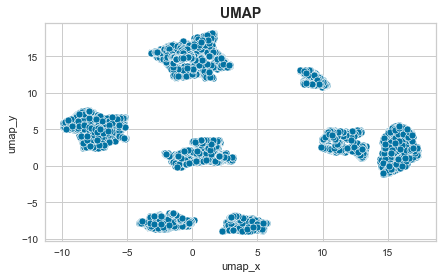

In [49]:
plt.figure(figsize=(7,4))
plt.title('UMAP', fontsize='14',fontweight='bold')
sns.scatterplot(data=clusters, x='umap_x', y='umap_y');

## Dimensionality Reduction - t-SNE

In [50]:
# Dimensionality Reduction(to 2D) using technique TSNE
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', n_jobs=-1, random_state=RANDOM_SEED)
tsne_embedding = tsne.fit_transform(components)

# X,y axis representation using TSNE
clusters['tsne_x'] = tsne_embedding[:,0]
clusters['tsne_y'] = tsne_embedding[:,1]

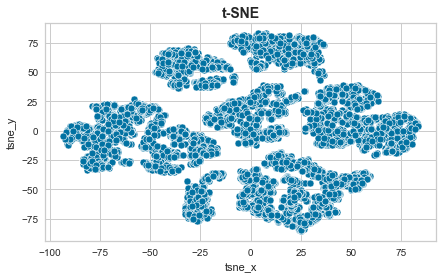

In [51]:
plt.figure(figsize=(7,4))
plt.title('t-SNE', fontsize='14',fontweight='bold')
sns.scatterplot(data=clusters, x='tsne_x', y='tsne_y');

## Plotting Settings

In [52]:
# Setting 2D plot parameters for Plotly
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))

def plot_graph2D(x,y, cluster, title):    
    name=cluster.name
    #data=data.sort_values(by=cluster.name, ascending=True)
    cluster=cluster.astype(str)
    
    fig = px.scatter(#data, 
                     x=x, 
                     y=y, 
                     color=cluster, 
                     color_discrete_sequence=px.colors.qualitative.Prism
                    )

    fig.update_traces(marker=dict(size=11, 
                              opacity=0.75, 
                              line=dict(width=1, color='#F7F7F7')))

    fig.update_layout(template=temp, 
                  title=title, 
                  width=700, 
                  legend_title='Clusters',                  
                  xaxis=dict(title='x', showline=True, zeroline=False), 
                  yaxis=dict(title='y',showline=True, zeroline=False))
    
    
    fig.show()

## Evaluating Metrics

**Davies-Bouldin Score** - É uma medida da compactação de clusters em um conjunto de dados. Ele avalia a similaridade média entre clusters e é usado para medir a qualidade de um algoritmo de agrupamento. O índice leva em consideração a similaridade intra-cluster e a separação inter-cluster, e varia entre 0 (agrupamento perfeito) e infinito (agrupamento ruim). Quanto menor a pontuação, melhor o agrupamento. O índice Davies-Bouldin é comumente usado em algoritmos de aprendizado de máquina para determinar o número ideal de clusters em um conjunto de dados.

$$ DB = \frac{1}{R}\sum_{i=1}^{n}\max_{1 \leq j \leq n, j \neq i}\left (\frac{s_i + s_j}{d_{ij}}\right )$$

onde:

$s_i$ é a distância média dos pontos no cluster $i$ ao seu centróide

$d_{ij}$ é a distância entre os centróides dos clusters 

$i$, $j$ e $R$ são o número de clusters.

***

**Silhouette Score** - O Silhouette Score é uma métrica usada para medir o quão próximo cada ponto em um cluster está dos pontos em outros clusters. Pode variar de -1 (indicando que o ponto está muito distante de outros clusters) a 1 (indicando que o ponto está muito próximo de outros clusters). É calculado tomando a média do coeficiente de silhueta para cada ponto.

$$s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$

onde:

$a(i) = \frac{1}{|C_i| - 1} \sum_{j \in C_i, j \neq i} d(i, j)$

$b(i) = \min_{k \in C, k \neq C_i} \left\{\frac{1}{|C_k|} \sum_{j \in C_k} d(i, j)\right\}$

$C_i$ is the set of data points in cluster $i$

$d(i, j)$ is the distance between data points $i$ and $j$

**AIC e BIC** - São dois tipos diferentes de critérios de informação usados para seleção de modelo em aprendizado de máquina. AIC significa Akaike Information Criterion e é uma medida da qualidade relativa de um modelo estatístico para um determinado conjunto de dados. Baseia-se na função de verossimilhança e penaliza modelos com mais parâmetros. BIC significa Bayesian Information Criterion e é uma medida da qualidade relativa de um modelo estatístico para um determinado conjunto de dados. Baseia-se na função log-verossimilhança e penaliza modelos com mais parâmetros. AIC e BIC são usados para selecionar o melhor modelo entre um conjunto de modelos candidatos. O modelo com menor AIC ou BIC é aquele que melhor se ajusta aos dados.

$AIC = 2k - 2 \ln (L)$

$BIC = \ln(n) \cdot k - 2 \ln (L)$<br>

onde:

$k$ is the number of parameters<br>
$L$ is the likelihood of the model<br>
$n$ is the number of observations

# Machine Learning

## KMEANS

In [53]:
# Finding best K param to Kmeans, using WCSS and Silhouette Score as metrics
kmeans_scores_list = []

for k in range(2,10):
    tunning_kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED)# init="k-means++",
    # We need to test which space (PCA, UMAP, t-SNE) performs best according to WCSS and Silhouette Score metrics
    # component, umap_embedding, tsne_embedding
    # Thus, the space embedding that presented the best results was the UMAP.
    tunning_kmeans_labels = tunning_kmeans.fit_predict(umap_embedding)
    
    ss = silhouette_score(umap_embedding, tunning_kmeans_labels, metric='euclidean')
    
    dbs = davies_bouldin_score(umap_embedding, tunning_kmeans_labels)
    
    kmeans_scores_list.append(pd.Series({'Clusters': k,
                                    'WCSS': tunning_kmeans.inertia_,
                                    'SS': ss,
                                    'Davies Bouldin Score': dbs}))

In [54]:
kmeans_scores_table = (pd.concat(kmeans_scores_list, axis=1).T[['Clusters','WCSS','SS','Davies Bouldin Score']].set_index('Clusters'))
kmeans_scores_table

WCSS        SS  Davies Bouldin Score
Clusters                                               
2.0       578001.937500  0.429674              1.068501
3.0       284002.656250  0.546228              0.717368
4.0       140032.859375  0.633386              0.582456
5.0        87046.695312  0.670829              0.443309
6.0        52469.218750  0.698649              0.393513
7.0        36023.417969  0.725387              0.344484
8.0        27006.974609  0.693681              0.444880
9.0        23422.750000  0.628094              0.602647

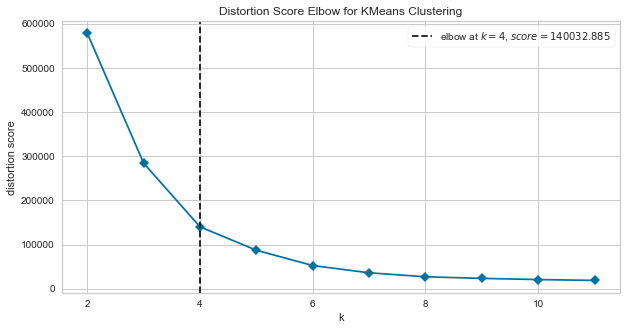

In [55]:
plt.figure(figsize=(10,5))
elbow = KElbowVisualizer(tunning_kmeans, k=(2,12), timings = False)
elbow.fit(umap_embedding) #, timings = False
elbow.show();

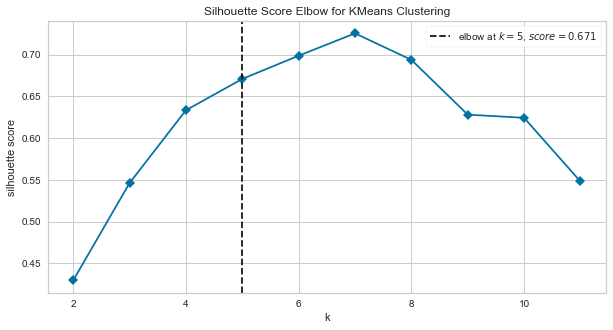

In [56]:
plt.figure(figsize=(10,5))
ss = KElbowVisualizer(tunning_kmeans, k=(2,12), metric = 'silhouette', timings = False)
ss.fit(umap_embedding)
ss.show();

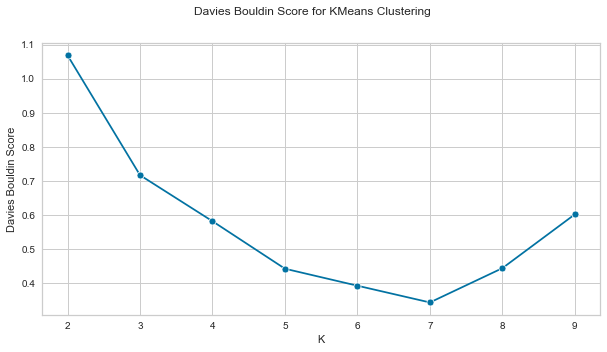

In [57]:
plt.figure(figsize=(10,5))
plt.suptitle('Davies Bouldin Score for KMeans Clustering', fontsize=12)
sns.lineplot(x=kmeans_scores_table.index, y=kmeans_scores_table['Davies Bouldin Score'], marker='o')
plt.xlabel('K');
plt.ylabel('Davies Bouldin Score');

In [58]:
# Using the best k find to our purpouse
k=7
kmeans = KMeans( n_clusters=k, random_state=RANDOM_SEED)#init = "k-means++",
kmeans_labels = kmeans.fit_predict(umap_embedding)
clusters['KMeans'] = kmeans_labels

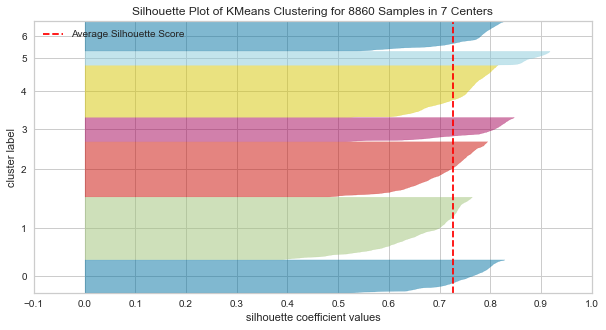

In [59]:
plt.figure(figsize=(10,5))
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(umap_embedding)
visualizer.finalize()

In [60]:
clusters.sort_values(by='KMeans')
plot_graph2D(clusters['umap_x'],
             clusters['umap_y'],
             clusters['KMeans'],
             title='KMeans Cluster using UMAP')

In [61]:
# plot_graph2D(clusters['tsne_x'],
#              clusters['tsne_y'],
#              clusters['KMeans-Cluster'],
#              title='KMeans Cluster using t-SNE')

## Hierarchical Clustering

In [62]:
hc_scores_list = []

for k in range(2,11):
    tunning_hc = hierarchy.linkage(umap_embedding, 'ward', metric='euclidean')# init="k-means++",
    
    # We need to test which space (PCA, UMAP, t-SNE) performs best according to WCSS and Silhouette Score metrics
    # component, umap_embedding, tsne_embedding
    # Thus, the space embedding that presented the best results was the UMAP.
    tunning_hc_labels = hierarchy.fcluster(tunning_hc, k, criterion='maxclust')
    
    ss = silhouette_score(umap_embedding, tunning_hc_labels, metric='euclidean')
    
    dbs = davies_bouldin_score(umap_embedding, tunning_hc_labels)
    
    hc_scores_list.append(pd.Series({'Clusters': k,
                                    'SS': ss,
                                    'Davies Bouldin Score': dbs}))

In [63]:
hc_scores_table = (pd.concat(hc_scores_list, axis=1).T[['Clusters','SS','Davies Bouldin Score']].set_index('Clusters'))

In [64]:
hc_scores_table

SS  Davies Bouldin Score
Clusters                                
2.0       0.431726              1.156518
3.0       0.538039              0.658457
4.0       0.633386              0.582456
5.0       0.670829              0.443309
6.0       0.698649              0.393513
7.0       0.725387              0.344484
8.0       0.693681              0.444880
9.0       0.623680              0.619444
10.0      0.619209              0.621363

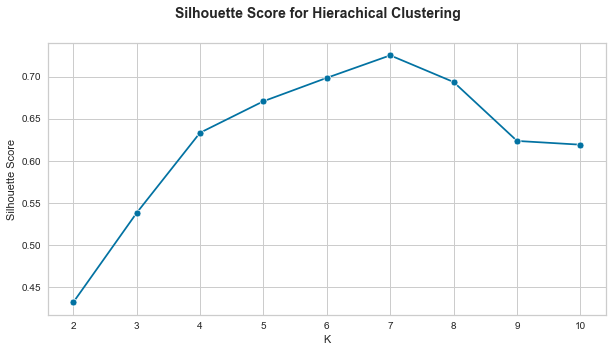

In [65]:
plt.figure(figsize=(10,5))
plt.suptitle('Silhouette Score for Hierachical Clustering', fontsize=14, fontweight='bold')
sns.lineplot(x=hc_scores_table.index, y=hc_scores_table['SS'], marker='o')
plt.xlabel('K');
plt.ylabel('Silhouette Score');

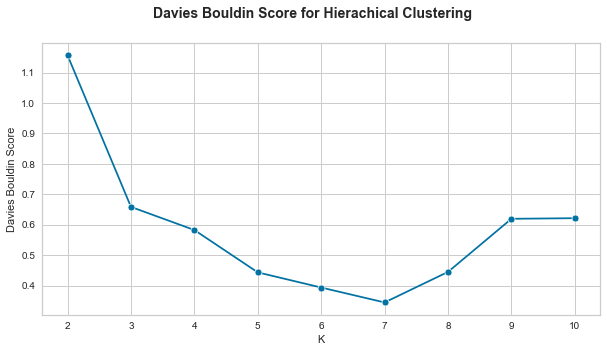

In [66]:
plt.figure(figsize=(10,5))
plt.suptitle('Davies Bouldin Score for Hierachical Clustering', fontsize=14, fontweight='bold')
sns.lineplot(x=hc_scores_table.index, y=hc_scores_table['Davies Bouldin Score'], marker='o')
plt.xlabel('K');
plt.ylabel('Davies Bouldin Score');

C:\Users\Alysson\AppData\Local\Temp/ipykernel_9804/1047813183.py:20: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



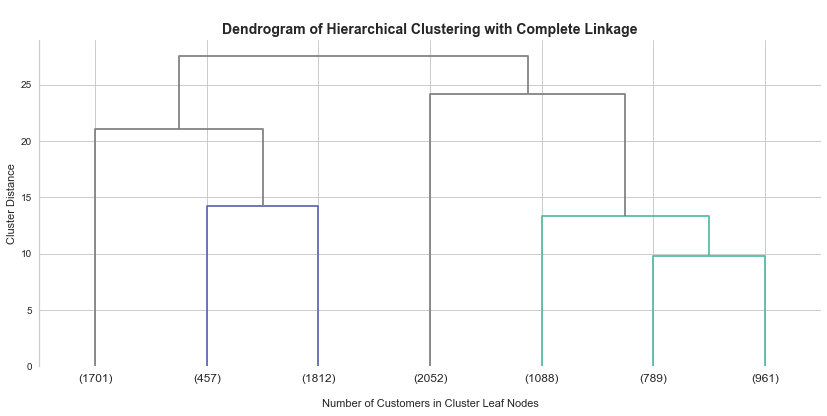

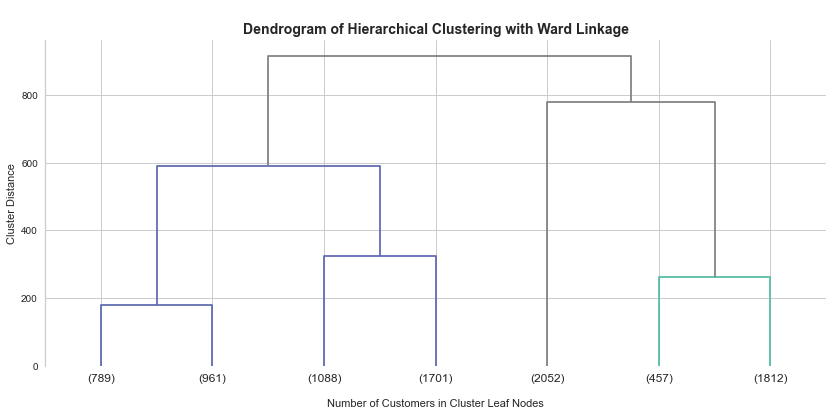

In [67]:
methods=['complete','ward']

for i in methods:
    Z = hierarchy.linkage(umap_embedding, method=i, metric='euclidean')
    hierarchy.set_link_color_palette(['#5d69b1', '#52bca3', '#99c945'])

    fig, ax = plt.subplots(figsize=(14,6))
    den=hierarchy.dendrogram(Z, 
                             p=7, 
                             truncate_mode='lastp',
                             show_leaf_counts=True, 
                             ax=ax,
                             above_threshold_color='grey') #orientation='top', #color_threshold=100,
    
    #ax.axhline(10, color='grey', linestyle='--')
    ax.set_title(f'\nDendrogram of Hierarchical Clustering with {i.capitalize()} Linkage', fontweight='bold', fontsize='14')
    ax.set_xlabel('\nNumber of Customers in Cluster Leaf Nodes')
    ax.set_ylabel('Cluster Distance')
    ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False), ax.spines['bottom'].set_visible(False)
    fig.show()

In [68]:
k=7
#hc = AgglomerativeClustering(k, affinity='euclidean', linkage='complete', compute_full_tree=False)
hc = hierarchy.linkage(umap_embedding, 'ward', metric='euclidean')
hc_labels = hierarchy.fcluster(hc, k, criterion='maxclust')
clusters["HierarchicalCluster"]=hc_labels

In [69]:
plot_graph2D(clusters['umap_x'],
             clusters['umap_y'],
             clusters['HierarchicalCluster'],
             title='Hierarchical Cluster using UMAP')

## Gausian Mistured Model

In [70]:
# Finding best K param to GMM, AIC and BIC as metrics
gmm_scores_list = []

for k in range(2,13):
    tunning_gmm = GaussianMixture(n_components=k, random_state=RANDOM_SEED)#n_init=5, init_params='k-means++', 
    tunning_gmm_labels = tunning_gmm.fit_predict(umap_embedding)
    
    
    ss = silhouette_score(umap_embedding, tunning_gmm_labels, metric='euclidean')
    dbs = davies_bouldin_score(umap_embedding, tunning_gmm_labels)
    
    gmm_scores_list.append(pd.Series({'Clusters': k,
                                    'AIC': tunning_gmm.aic(umap_embedding),
                                    'BIC': tunning_gmm.bic(umap_embedding),
                                    'SS': ss,
                                    'Davies Bouldin Score': dbs}))
    
gmm_scores_table = (pd.concat(gmm_scores_list, axis=1).T[['Clusters','AIC','BIC','SS','Davies Bouldin Score']]).set_index('Clusters')

In [71]:
gmm_scores_table

AIC            BIC        SS  Davies Bouldin Score
Clusters                                                              
2.0       116159.095544  116237.077867  0.426235              0.875371
3.0       108928.695286  109049.213420  0.538039              0.658457
4.0        99969.333270  100132.387217  0.633386              0.582456
5.0        96374.904462   96580.494222  0.670829              0.443309
6.0        92701.155530   92949.281101  0.698649              0.393513
7.0        90941.984403   91232.645787  0.725387              0.344484
8.0        90387.037835   90720.235031  0.659292              0.541759
9.0        88949.250259   89324.983268  0.627784              0.605262
10.0       88672.783401   89091.052221  0.621560              0.615202
11.0       88231.321162   88692.125795  0.581615              0.678180
12.0       87773.557566   88276.898011  0.520104              0.756882

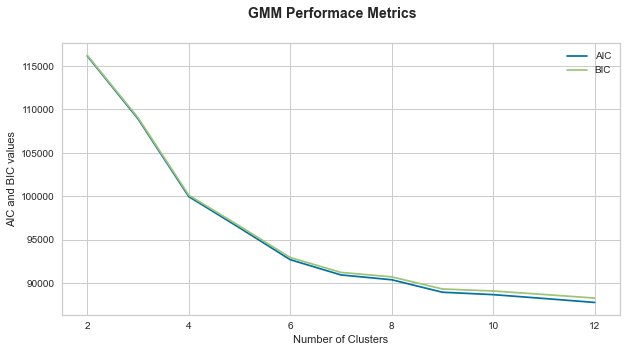

In [72]:
plt.figure(figsize=(10,5))
plt.suptitle('GMM Performace Metrics', fontsize=14, fontweight='bold')
sns.lineplot(x=gmm_scores_table.index, y=gmm_scores_table.AIC, label='AIC')
sns.lineplot(x=gmm_scores_table.index, y=gmm_scores_table.BIC, label='BIC')
plt.ylabel('AIC and BIC values')
plt.xlabel('Number of Clusters')
plt.legend(loc='best');

In [52]:
plt.figure(figsize=(10,5))
plt.suptitle('Silhouette Score for GMM Clustering', fontsize=14, fontweight='bold')
sns.lineplot(x=gmm_scores_table.index, y=gmm_scores_table['SS'], marker='o')
plt.xlabel('K');
plt.ylabel('Silhouette Score');

NameError: name 'gmm_scores_table' is not defined

<Figure size 720x360 with 0 Axes>

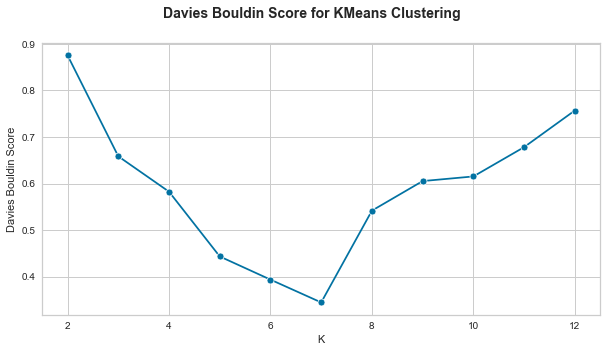

In [74]:
plt.figure(figsize=(10,5))
plt.suptitle('Davies Bouldin Score for KMeans Clustering', fontsize=14, fontweight='bold')
sns.lineplot(x=gmm_scores_table.index, y=gmm_scores_table['Davies Bouldin Score'], marker='o')
plt.xlabel('K');
plt.ylabel('Davies Bouldin Score');

In [75]:
k=7
gmm = GaussianMixture(n_components=k, random_state=RANDOM_SEED)#n_init=5, init_params='k-means++',
gmm_labels = gmm.fit_predict(umap_embedding)
clusters['GMM'] = gmm_labels

In [76]:
#clusters_results.sort_values(by='GMM')
plot_graph2D(clusters['umap_x'],
             clusters['umap_y'],
             clusters['GMM'],
             title='GMM Cluster using UMAP')

## Best Model

In [77]:
cluster_results = clusters.copy()

In [78]:
cluster_results = pd.concat([clusters[['GMM']], data_new],axis=1)
cluster_results

GMM CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
0     2.0  C10001    40.900749           0.818182      95.40              0.00                   95.40      0.000000             0.166667                    0.000000                          0.083333                0.000000               0.0            2.0        1000.0   201.802084        139.509787          0.000000    12.0
1     1.0  C10002  3202.467416           0.909091       0.00              0.00                    0.00   6442.945483             0.000000                    0.000000                          0.000000                0.250000               4.0            0.0        7000.0  4103.032597       1072.340217          0.222222    12.0
2     0.0  C10003  2495.148862           1.000000     773.17            773.17                    0.00      0.000000             1.000000                    1.000000                          0.000000                0.000000               0.0           12.0        7500.0   622.066742        627.284787          0.000000    12.0
3     3.0  C10004  1666.670542           0.636364    1499.00           1499.00                    0.00    205.788017             0.083333                    0.083333                          0.000000                0.083333               1.0            1.0        7500.0     0.000000        379.829982          0.000000    12.0
4     0.0  C10005   817.714335           1.000000      16.00             16.00                    0.00      0.000000             0.083333                    0.083333                          0.000000                0.000000               0.0            1.0        1200.0   678.334763        244.791237          0.000000    12.0
...   ...     ...          ...                ...        ...               ...                     ...           ...                  ...                         ...                               ...                     ...               ...            ...           ...          ...               ...               ...     ...
8945  2.0  C19186    28.493517           1.000000     291.12              0.00                  291.12      0.000000             1.000000                    0.000000                          0.833333                0.000000               0.0            6.0        1000.0   325.594462         48.886365          0.500000     6.0
8946  2.0  C19187    19.183215           1.000000     300.00              0.00                  300.00      0.000000             1.000000                    0.000000                          0.833333                0.000000               0.0            6.0        1000.0   275.861322        156.060050          0.000000     6.0
8947  2.0  C19188    23.398673           0.833333     144.40              0.00                  144.40      0.000000             0.833333                    0.000000                          0.666667                0.000000               0.0            5.0        1000.0    81.270775         82.418369          0.250000     6.0
8948  1.0  C19189    13.457564           0.833333       0.00              0.00                    0.00     36.558778             0.000000                    0.000000                          0.000000                0.166667               2.0            0.0         500.0    52.549959         55.755628          0.250000     6.0
8949  3.0  C19190   372.708075           0.666667    1093.25           1093.25                    0.00    127.040008             0.666667                    0.666667                          0.000000                0.333333               2.0           23.0        1200.0    63.165404         88.288956          0.000000     6.0

[8950 rows x 19 columns]

In [79]:
aux1=cluster_results.groupby('GMM').mean().reset_index()
aux2=cluster_results[['PURCHASES_FREQUENCY','GMM']].groupby('GMM').count().rename(columns={'PURCHASES_FREQUENCY': 'COUNT'}).reset_index()
cluster_results_mean = aux2.merge(aux1, how='left', on='GMM').set_index('GMM').T

In [80]:
cm = sns.light_palette("#A2A2A2", as_cmap = True)

cluster_results_mean=cluster_results_mean.style.background_gradient(cmap = cm, axis = 1)\
    .set_precision(2)\
    .highlight_min(axis = 1, color = "#FF6347")\
    .highlight_max(axis = 1, color = "#2F4F4F")

cluster_results_mean

<blockquote style="color: #000000;">

**Cluster 00 - Cannot Lose Them** 
- São clientes que <mark>utilizam o cartão de crédito com baixa frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>alta frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>baixissima frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>baixissima frequencia</mark> 
- São clientes que possuem <mark>moderada taxa de pagamento</mark>  com relação ao valor integral do cartão de crédito

*Rating: 3.5*

***

**Cluster 01 - Hinernating** 
- São clientes que <mark>utilizam o cartão de crédito com baixissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>baixissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>baixissima frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>alta frequencia</mark>
- São clientes que possuem <mark>baixa taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 1.0

***

**Cluster 02 - Champions** 
- São clientes que <mark>utilizam o cartão de crédito com alta frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>baixissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>altissima frequencia</mark> 
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>baixissima frequencia</mark>
- São clientes que possuem <mark>alta taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 5.0

***

**Cluster 03 - Trouble Costumer** 
- São clientes que <mark>utilizam o cartão de crédito com baixa frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>moderada frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>baixissima frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>alta frequencia</mark>
- São clientes que possuem <mark>baixa taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 2.5

***

**Cluster 04 - Loyal Customers** 
- São clientes que <mark>utilizam o cartão de crédito com altissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>alta frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>moderada frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>baixissima frequencia</mark>
- São clientes que possuem <mark>alta taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 4.5
    
***

**Cluster 05 - Need Attention** 
- São clientes que <mark>utilizam o cartão de crédito com moderada frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>baixissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>alta frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>alta frequencia</mark>
- São clientes que possuem <mark>baixa taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 3.0

***

**Cluster 06**
- São clientes que <mark>utilizam o cartão de crédito com altissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>alta frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>moderada frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>alta frequencia</mark>
- São clientes que possuem <mark>baixa taxa de pagamento</mark> com relação ao valor integral do cartão de crédito


Rating: 3.0
    
</blockquote>    